In [1]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
print('imported Successfully')

Importing packages...
imported Successfully


In [2]:
print('Reading data...')
dfTrain = pd.read_csv(r'C:\Users\adity\Example1\example\venv\train.csv')
dfTest = pd.read_csv(r'C:\Users\adity\Example1\example\venv\test.csv')
# All Available Columns: 'member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'sub_grade', 'term', 'batch_enrolled', 'desc', 'grade', 'emp_length', 'int_rate', 'pymnt_plan', 'initial_list_status', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'verification_status_joint', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status
dfTrain = dfTrain[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
dfTest = dfTest[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]
print('Read Data Successfully')

Reading data...
Read Data Successfully


In [3]:
'''
Data transformation/cleanup
Strip off textual parts, represent values as numeric values
it makes sense. Convert the datatype to numeric.
'''
print('Transform: term...')
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')
dfTest['term'] = pd.to_numeric(dfTest['term'], errors='coerce')

print('Transform: emp_length...')
dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTest['emp_length'].replace('n/a', '0', inplace=True)
dfTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')
dfTest['emp_length'] = pd.to_numeric(dfTest['emp_length'], errors='coerce')

print('Transform: last_week_pay...')
dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')
dfTest['last_week_pay'] = pd.to_numeric(dfTest['last_week_pay'], errors='coerce')

print('Transform: sub_grade...')
dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')

print('Transform done.')

Transform: term...
Transform: emp_length...
Transform: last_week_pay...
Transform: sub_grade...
Transform done.


In [4]:
'''
To check no.of values are null in each attr.
'''
dfTrain.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
addr_state                          0
funded_amnt_inv                     0
sub_grade                           0
term                                0
emp_length                      26891
int_rate                            0
annual_inc                          3
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
collections_12_mths_ex_med         95
mths_since_last_major_derog    399448
last_week_pa

In [5]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','recoveries', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)
    dfTest[col].fillna(dfTest[col].median(), inplace=True)

cols = ['total_rec_late_fee', 'recoveries']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)
    dfTest[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: recoveries
Imputation with Median: emp_length
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Missing value imputation done.


In [6]:
# Columns home_ownership and purpose columns attributes were earlier included and were considered categorical
# But since the feature importance was low, they were removed. Keeping this section here for sake of completeness
# of data preprocessing steps for reference, to dummify/categorize variables, update list of attributes cat_attr

#cat_attr = ['home_ownership', 'purpose']
#for cat in cat_attr:
#    print('Categorizing: %s...' % (cat))
#    df_col = [cat]
#    dfTrain[cat] = dfTrain[cat].astype("category")
#    dfTrain[cat] = pd.get_dummies(dfTrain, columns=df_col)
#    dfTest[cat] = dfTest[cat].astype("category")
#    dfTest[cat] = pd.get_dummies(dfTest, columns=df_col)

In [7]:
'''
Feature Engineering
'''

# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(dfTest['member_id'])

# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq','open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int','total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim','recoveries','term','loan_status']
selected_cols_test = ['member_id','emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int','total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim','recoveries', 'term']
finalTrain = dfTrain[selected_cols]
finalTest = dfTest[selected_cols_test]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']


# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']


# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)


# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100) + ((finalTest['recoveries']/finalTest['funded_amnt_inv']) * 100)
print('Done with Feature Engineering......')

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

Done with Feature Engineering......


C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
finalTrain.isnull().sum()

emp_length                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
sub_grade                        0
int_rate                         0
annual_inc                       0
dti                              0
mths_since_last_delinq           0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
mths_since_last_major_derog      0
last_week_pay                    0
tot_cur_bal                      0
total_rev_hi_lim                 0
recoveries                       0
term                             0
loan_status                      0
loan_to_income                   0
avl_lines                        0
int_paid                         0
emi_paid_progress_perc           0
total_repayment_progress       113
dtype: int64

In [9]:
finalTest.isnull().sum()

member_id                       0
emp_length                      0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
sub_grade                       0
int_rate                        0
annual_inc                      0
dti                             0
mths_since_last_delinq          0
open_acc                        0
revol_bal                       0
revol_util                      0
total_acc                       0
total_rec_int                   0
total_rec_late_fee              0
mths_since_last_major_derog     0
last_week_pay                   0
tot_cur_bal                     0
total_rev_hi_lim                0
recoveries                      0
term                            0
loan_to_income                  0
avl_lines                       0
int_paid                        0
emi_paid_progress_perc          0
total_repayment_progress       84
dtype: int64

In [10]:
finalTrain=finalTrain.replace([np.inf,], np.nan)
finalTest=finalTest.replace([np.inf,], np.nan)

In [11]:
finalTrain.isnull().sum()

emp_length                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
sub_grade                        0
int_rate                         0
annual_inc                       0
dti                              0
mths_since_last_delinq           0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
mths_since_last_major_derog      0
last_week_pay                    0
tot_cur_bal                      0
total_rev_hi_lim                 0
recoveries                       0
term                             0
loan_status                      0
loan_to_income                 139
avl_lines                        0
int_paid                         0
emi_paid_progress_perc           0
total_repayment_progress       139
dtype: int64

In [12]:
finalTest.isna().sum()

member_id                       0
emp_length                      0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
sub_grade                       0
int_rate                        0
annual_inc                      0
dti                             0
mths_since_last_delinq          0
open_acc                        0
revol_bal                       0
revol_util                      0
total_acc                       0
total_rec_int                   0
total_rec_late_fee              0
mths_since_last_major_derog     0
last_week_pay                   0
tot_cur_bal                     0
total_rev_hi_lim                0
recoveries                      0
term                            0
loan_to_income                 94
avl_lines                       0
int_paid                        0
emi_paid_progress_perc          0
total_repayment_progress       94
dtype: int64

In [13]:
finalTrain = finalTrain[np.isfinite(finalTrain).all(1)]

In [14]:
finalTest=finalTest.fillna(0)

In [15]:
# Separating the loan_status column of train dataframe to check accuracy
final_target=finalTrain['loan_status']
finalTrain=finalTrain.drop(['loan_status'],axis=1)

In [16]:
finalTrain.shape

(532289, 26)

In [17]:
finalTest.shape

(354951, 27)

In [18]:
#this file(cleaned test.csv) will use in app
finalTest.to_csv((('%s.csv') % ('finalTest_csv_26')), index=False)

In [19]:
del finalTest['member_id']

In [20]:
X= finalTrain
y=final_target

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

In [23]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [24]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred=clf.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 86.39776562901176


In [27]:
final_pred = pd.DataFrame(columns=['loan_d_pred'])

In [28]:
final_pred['loan_d_pred']=clf.predict(finalTest)

In [29]:
final_pred.shape

(354951, 1)

In [30]:
#To create submission file
submission_file = pd.DataFrame({ 'Member_ID': dfTest['member_id'], 'Loan_Status': final_pred['loan_d_pred'] })
submission_file.to_csv((('%s.csv') % ('submission_26')), index=False)


submission_file.head(10)


,Member_ID,Loan_Status
0,11937648,0
1,38983318,0
2,27999917,0
3,61514932,0
4,59622821,0
5,28822038,0
6,10718089,0
7,58114582,0
8,35023176,0
9,1268247,0


In [31]:
import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.title('Important Features')
plt.xlabel('features')
plt.ylabel('importance')
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.savefig('imp_f.png')
plt.show()

[0.01828163 0.02270354 0.02324475 0.02695861 0.06026287 0.07681802
 0.03183501 0.04651797 0.02234444 0.02471677 0.03916822 0.03924339
 0.02802121 0.04144996 0.00200648 0.01425514 0.05706071 0.08313847
 0.06162069 0.01960495 0.01000826 0.03743621 0.02891207 0.04173912
 0.08188492 0.06076659]
0 emp_length
1 loan_amnt
2 funded_amnt
3 funded_amnt_inv
4 sub_grade
5 int_rate
6 annual_inc
7 dti
8 mths_since_last_delinq
9 open_acc
10 revol_bal
11 revol_util
12 total_acc
13 total_rec_int
14 total_rec_late_fee
15 mths_since_last_major_derog
16 last_week_pay
17 tot_cur_bal
18 total_rev_hi_lim
19 recoveries
20 term
21 loan_to_income
22 avl_lines
23 int_paid
24 emi_paid_progress_perc
25 total_repayment_progress


<Figure size 640x480 with 1 Axes>

In [32]:
#creating a pickle file using joblib

from sklearn.externals import joblib
joblib.dump(clf,'RF_BLDP_26.pkl')

['RF_BLDP_26.pkl']

In [33]:
s=final_pred
s=s.replace(0, 'No')
s=s.replace(1,'YES')

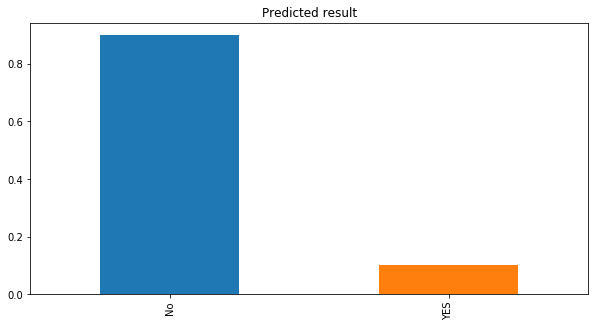

In [34]:
plt.figure(1)
s['loan_d_pred'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Predicted result')
plt.savefig('./static/prediction_bar1.png')

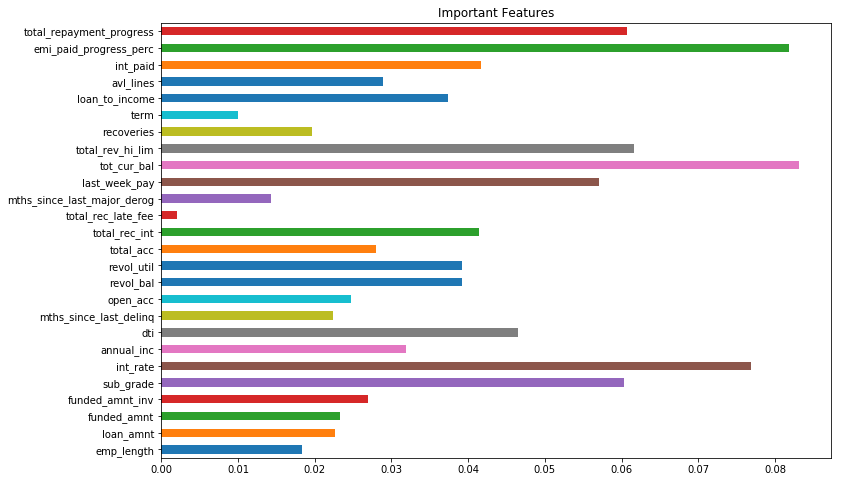

In [72]:
plt.figure(1)
importances=pd.Series(clf.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8)).set_title('Important Features')
plt.savefig('./static/imp_f.png')

In [38]:
import seaborn as sns

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


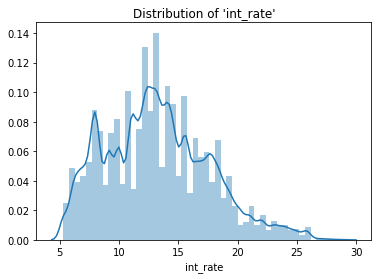

In [45]:
# To check the distribution of interest rate
sns.distplot(finalTrain['int_rate']).set_title("Distribution of 'int_rate'");

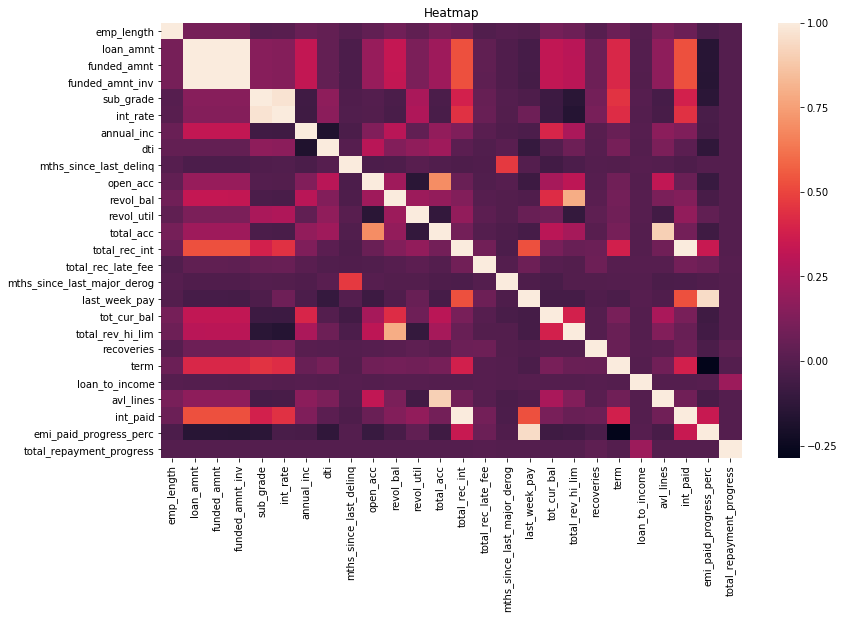

In [73]:
plt.figure(figsize = (13,8))
sns.heatmap(finalTrain.corr()).set_title('Heatmap')
plt.savefig('./static/heatmap.png')

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


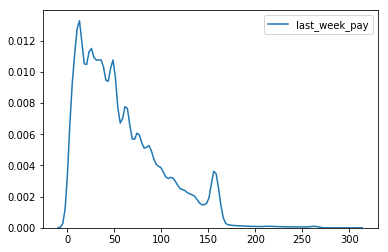

In [66]:
sns.kdeplot(finalTrain['last_week_pay']);